<a href="https://colab.research.google.com/github/nngeek195/hora_pusa_ai/blob/main/HoraPusaAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import os
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
import zipfile
import io

# Upload the .zip file containing your folder
uploaded = files.upload()

# Assuming the uploaded file is named 'example.zip'
file_name = next(iter(uploaded))

# Open and extract the contents of the uploaded .zip file
with zipfile.ZipFile(io.BytesIO(uploaded[file_name]), 'r') as zip_ref:
    zip_ref.extractall('/content/unzipped')  # Specify the extraction path

# List the contents of the extracted folder
import os
extracted_folder = '/content/unzipped'
print(os.listdir(extracted_folder))


KeyboardInterrupt: 

In [ ]:
cat_face_cascade = cv2.CascadeClassifier('haarcascade_frontalcatface.xml')

def detect_and_crop_cat_face(img_path):
    img = cv2.imread(img_path)
    if img is None:  # Check if image loaded successfully
        print(f"Failed to load image: {img_path}")
        return None

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = cat_face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    for (x, y, w, h) in faces:
        face = img[y:y+h, x:x+w]
        face = cv2.resize(face, (150, 150))
        return face
    return None

def load_images_from_folder_with_face_detection(folder):
    images = []
    labels = []
    for category in os.listdir(folder):
        category_path = os.path.join(folder, category)
        label = category
        for filename in os.listdir(category_path):
            img_path = os.path.join(category_path, filename)
            face = detect_and_crop_cat_face(img_path)
            if face is not None:
                img_array = img_to_array(face)
                images.append(img_array)
                labels.append(label)
    return np.array(images), np.array(labels)

train_dir = 'data/train'
validation_dir = 'data/validation'

train_images, train_labels = load_images_from_folder_with_face_detection(train_dir)
validation_images, validation_labels = load_images_from_folder_with_face_detection(validation_dir)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
validation_labels_encoded = label_encoder.transform(validation_labels)

train_labels_categorical = to_categorical(train_labels_encoded)
validation_labels_categorical = to_categorical(validation_labels_encoded)


In [ ]:
train_images = train_images / 255.0
validation_images = validation_images / 255.0


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(3, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_images, train_labels_categorical,
    epochs=20,
    batch_size=20,
    validation_data=(validation_images, validation_labels_categorical)
)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.1667 - loss: 1.1407 - val_accuracy: 0.5000 - val_loss: 0.8931
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.8931 - val_accuracy: 0.3333 - val_loss: 0.8991
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step - accuracy: 0.3333 - loss: 0.8991 - val_accuracy: 0.5000 - val_loss: 0.8943
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.8943 - val_accuracy: 0.8333 - val_loss: 0.7643
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8333 - loss: 0.7643 - val_accuracy: 1.0000 - val_loss: 0.6636
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 821ms/step - accuracy: 1.0000 - loss: 0.6636 - val_accuracy: 0.8333 - val_loss: 0.5422
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8333 - loss: 0.5422 - val_accuracy: 1.0000 - val_loss: 0.3734
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.3734 - val_accuracy: 1.0000 - val_loss: 0.2381
Epoch 9/20

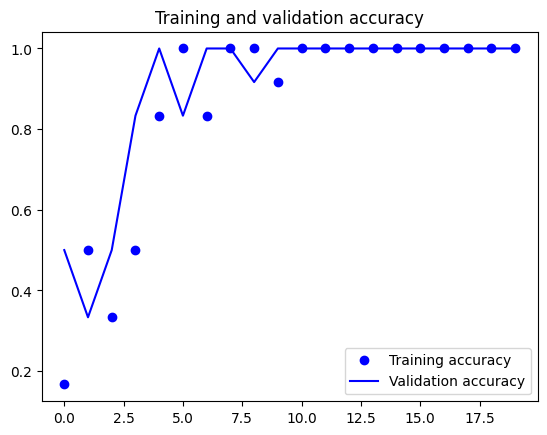

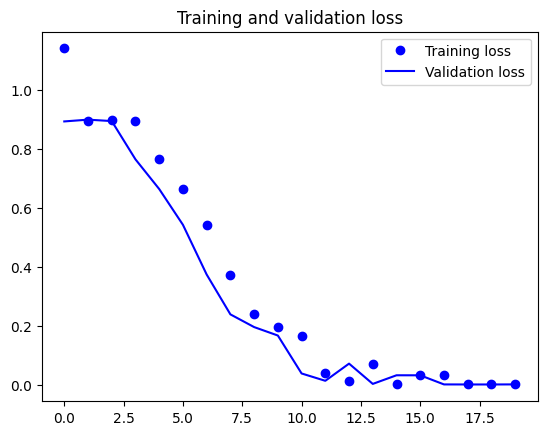

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [ ]:
def load_image(img_path, show=False):
    face = detect_and_crop_cat_face(img_path)
    if face is not None:
        img_tensor = img_to_array(face)
        img_tensor = np.expand_dims(img_tensor, axis=0)
        img_tensor /= 255.

        if show:
            plt.imshow(img_tensor[0])
            plt.axis('off')
            plt.show()

        return img_tensor
    return None

new_image = load_image('1.jpeg')
if new_image is not None:
    pred = model.predict(new_image)
    cat_classes = label_encoder.classes_
    print("Prediction:", cat_classes[np.argmax(pred)])
else:
    print("Boss මේ බලු පැටියෙක්.")
    #//////////////////////////////////////////////////////
    #//////////////////////////////////////////////////////
    #//////////////////////////////////////////////////////
    #//////////////////////////////////////////////////////
    #//////////////////////////////////////////////////////
    #//////////////////////////////////////////////////////
    #//////////////////////////////////////////////////////
    #//////////////////////////////////////////////////////
    #//////////////////////////////////////////////////////
    #//////////////////////////////////////////////////////



Boss මේ බලු පැටියෙක්.
